### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Photometric transformations**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228


### Introduction

Image is defined as two dimensional function *f(x,y)* where x and y are spatial (plane) coordinates, and the amplitud of *f* at any pair of coordinates (*x*, *y*) is called the intensity of the image at that point.


#### Image processing has 3 types of computerized process:
* Low-level
    it involves in basic operations such as image preprocessing to **reduce noise**, **constrat ehancement** and image sharpening.

    <img src="./data/activity 1/low_level.png" alt="low level" width="500"/>
* Mid-level
    it involves tasks such as **segmentation**, **classification of individual objects**.

    <img src="./data/activity 1/mid_level.png" alt="mid level" width="600"/>
* High-level
    it involves "making sense" of an ensemble of recognized objects, as image analysis and performing the cognitive functions associated with human vision.

     <img src="./data/activity 1/high_level.png" alt="mid level" width="500"/>


#### Photometric Tranformations:

Photometric transformations are applied to change visual appearance of an image while preserving the its geometric structure. Some photometric transformations modify image's brightness, constrast, colour or tone.

In this introductory notebook we are going to focus in Low-level processing with the following photometric transformations.

|   |   |   |   |  Image Substraction |  Gamma correction |  Negative Transformation |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| Definition  |   |   |   | Subtracts pixel values from another image or a constant, making emphazis in differences  |  Adjusts the intensity of an image by applying a power law function | Inverts pixel intensities to create a negative effect  |
| Formula  |   |   |   | *I*<sup>'</sup> = *I*<sub>1</sub> - *I*<sub>2</sub> <br/> *I*<sup>'</sup> = *I* - *C* | *I*<sup>'</sup> = *c* ⋅ *I*<sup>γ</sup>  | *I* = *L* - 1 - *I*  |
|  Purpose |   |   |   | Highlight differences between two images | Corrects brightness and contrast non-linearly  | Creates an inverse image  |
| Visual Impact  |   |   |   | Highligths differences or removes background  |  Enhances details in dark or bright regions  |  Producces a negative effect, reversing light and dark regions  |
| Control parameters  |   |   |   |  second image or *C* | Scaling factor *C*, Gamma value γ  | Maximum intensity *L* (255 for 8-bit)  |





### Importing libraries

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

### Loading Images

In [2]:
# Loading images
dog_img = Image.open('data/activity 1/perrito.jpeg')
dental_img = Image.open('data/activity 1/dental-x-ray.jpg')
microscope_img = Image.open('data/activity 1/microscope.jpg')
paysage_img = Image.open('data/activity 1/paysage.png')
retina_img = Image.open('data/activity 1/retina.png')
map_img = Image.open('data/activity 1/map2.jpg')
example_circuit_img = Image.open('data/activity 1/example_circuit.jpg')
defected_circuit_img = Image.open('data/activity 1/defected_circuit.jpg')
eiffel_img = Image.open('data/activity 1/eiffel.jpg')

### 1. Types of Photometric Tranformation

#### 1.1 Adjusting Brightness and Contrast

* **Brightness**: involves increasing or decreasing the intensity of the pixels. (**Beta** parameter adds brightness)
* **Contrast**: This modifies the difference between the brightness and the darkest parts of the image. (**Alpha** parameter scales contrast)


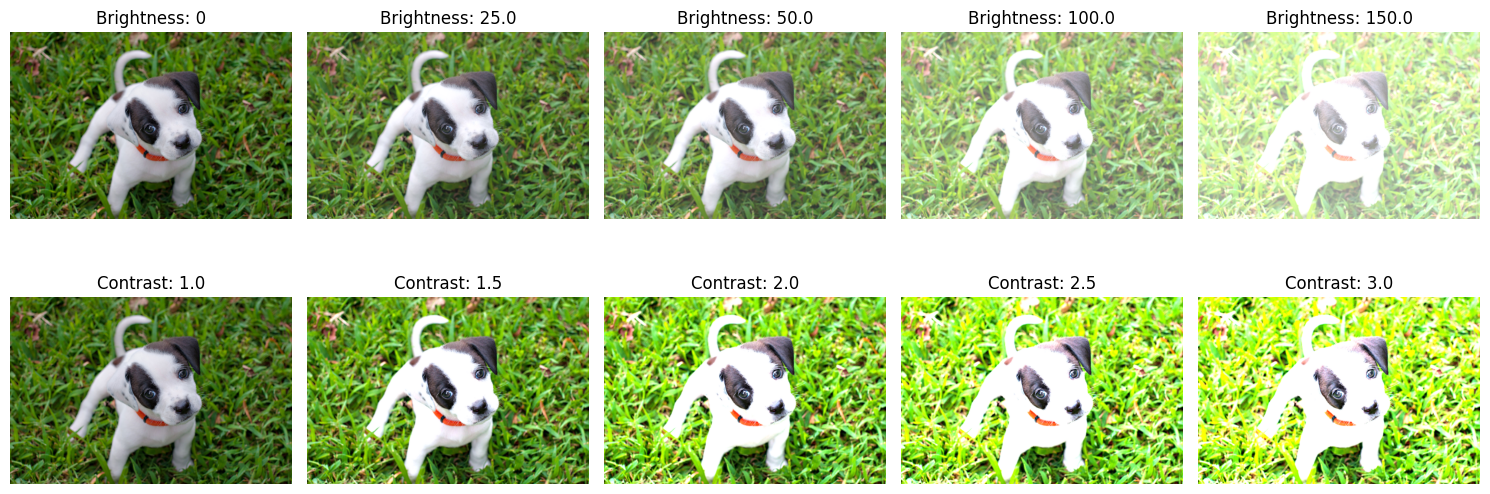

In [3]:
# anonimal function to test scales in alpha and beta
adjust_brightness_contrast = lambda img, a=1, b=0: cv2.convertScaleAbs(np.array(img), alpha=a, beta=b)
# scale of brightness and contrast
bright_scales = [0, 25.0, 50.0, 100.0, 150.0]
contrast_scales = [1.0, 1.5, 2.0, 2.5, 3.0]
# iterating the brightness dog imgs
brightness_dog_imgs = [adjust_brightness_contrast(img=dog_img, b=bright_scale) for bright_scale in bright_scales]
# iterating the contrast dog imgs
contrast_dog_imgs = [adjust_brightness_contrast(img=dog_img, a=contrast_scale) for contrast_scale in contrast_scales]

# ploting the results
fig, axs = plt.subplots(2, len(contrast_scales), figsize=(15,6))

for i, bright_img in enumerate(brightness_dog_imgs):
    axs[0, i].imshow(bright_img)
    axs[0, i].set_title(f"Brightness: {bright_scales[i]}")
    axs[0, i].axis("off")

for i, contrast_img in enumerate(contrast_dog_imgs):
    axs[1, i].imshow(contrast_img)
    axs[1, i].set_title(f"Contrast: {contrast_scales[i]}")
    axs[1, i].axis("off")

plt.tight_layout()
plt.show()

#### 1.2 *Thresholding*

This technique converts an image into a binary format (black and white) based on whether the pixel values are greater than or less than a defined threshold (T).  
  
The transformation formula for a pixel *I<sub>(x, y)</sub>* is as follows:
  
<img src="./data/activity 1/thresholding.png" alt="Thresholding transformation" width="250"/>    
  
This technique is used to segment objects of interest from the background in images, process documents for OCR applications, recognize patterns for ML models, isolate moving objects in video frames, and generate masks to define regions for further transformations, among other cases.

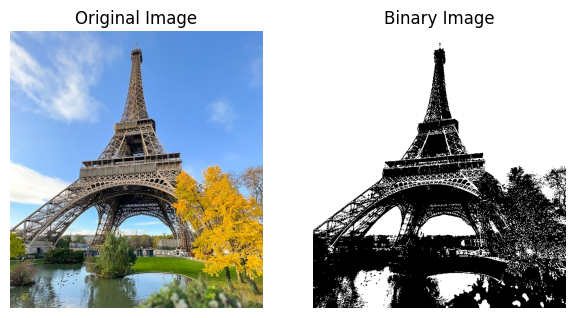

In [4]:
#Load the image in grayscale
eiffel_gray = cv2.cvtColor(np.array(eiffel_img), cv2.COLOR_BGR2GRAY)

#Apply thresholding with T = 144 and Max value = 255
eiffel_th = cv2.threshold(eiffel_gray, 144, 255, cv2.THRESH_BINARY)[1]

#Plot both images
plt.figure(figsize=(15,5))
plt.subplot(1,4,1), plt.imshow(eiffel_img, cmap='gray'), plt.title("Original Image"), plt.axis('off')
plt.subplot(1,4,2), plt.imshow(eiffel_th, cmap='gray'), plt.title("Binary Image"), plt.axis('off')
plt.show()

#### 1.3 Contrast Stretching

Contrast Stretching is a technique that improves the contrast of an image by stretching the range of intensity values to span a desired range (0-255 for 8-bit images)

**Transformation used for contrast stretching**

<img src="./data/activity 1/stretching_transformation.png" alt="Stretching transformation" width="250"/>


The locations of points (*r<sub>1</sub>*,*s<sub>1</sub>*) and (*r<sub>2</sub>*, *s<sub>2</sub>*) control the shape of the transformation function.

If *r<sub>1</sub>* = *s<sub>1</sub>* and *r<sub>2</sub>* = *s<sub>2</sub>* the transformation is linear that produces no changes in the intensity.

If *r<sub>1</sub>* = *r<sub>2</sub>*, *s<sub>1</sub>* = 0, and *s<sub>2</sub>* = *L* - 1 the transformation becomes a thresholding function. (creates a binary image)

<img src="./data/activity 1/binary_img.png" alt="Binary image" width="100"/>

If (*r<sub>1</sub>*, *s<sub>1</sub>*) = (*r*<sub>min</sub>, 0) and (*r<sub>2</sub>*, *s<sub>2</sub>*) = (*r*<sub>max</sub>, *L* - 1) where *r*<sub>min</sub> and *r*<sub>max</sub> denote the minimum and maximum intensity levels in the input image.

<img src="./data/activity 1/contrast_stretching_formula.png" alt="contrast stretching formula" width="250"/>

where:

* *r*: Input pixel intensity.
* *r*<sub>min</sub> and *r*<sub>max</sub>: Minimum and maximum intensity values in the input image.
* *s*<sub>min</sub> and *s*<sub>max</sub>: Desired intensity range (e.g., 0-255).
* *s*: Output pixel intensity.


**when to use contrast stretching**:
* when our image has low contrast.
* Improving the constrast of X-rays images.

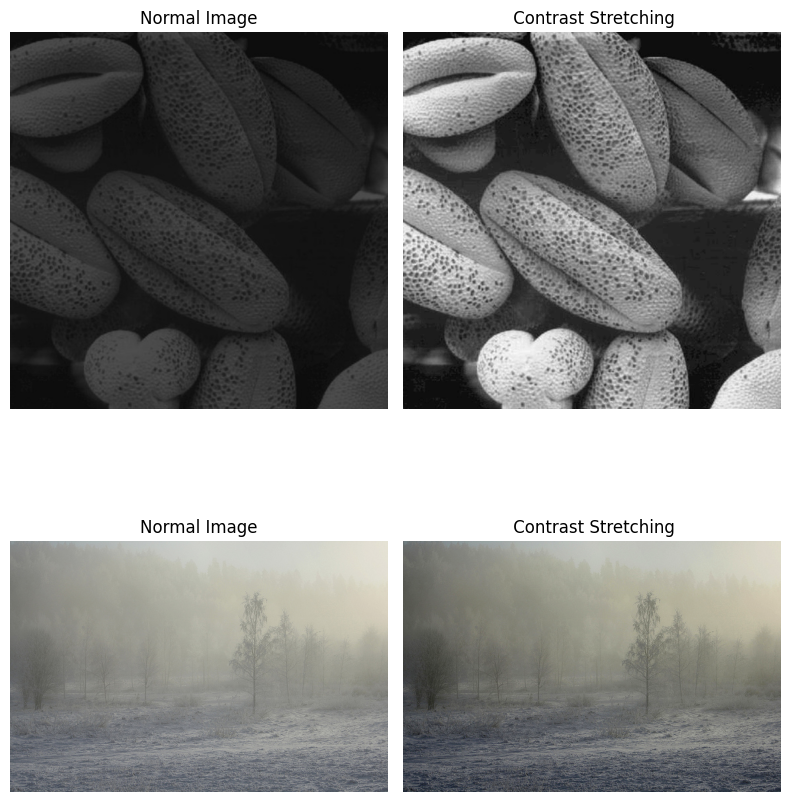

In [5]:
def r_intensity(img):
    """
    calculating r_min and r_max intensity values in the input image
    """
    # Calculate r_min and r_max
    r_min, r_max = np.min(img), np.max(img)
    return { 'min': r_min, 'max': r_max }

# apply contrast stretching
def contrast_stretching(img, r_min, r_max):
    """
    Contrast stretching mathematical operation
    """
    # Define desired INTENSITY s_min and s_max
    s_min, s_max = 0, 255
    # Output pixel intensity
    s = ((img - r_min) / (r_max - r_min) * (s_max - s_min) + s_min).astype(np.uint8)
    return s

# images as array
microscope_img_array = np.array(microscope_img)
paysage_img_array = np.array(paysage_img)

# getting intensity of images
r_microscope = r_intensity(microscope_img_array)
r_paysage = r_intensity(paysage_img_array)

# images to test contrast stretching
contrast_str_imgs = [
                     [microscope_img_array, contrast_stretching(microscope_img_array, r_microscope['min'], r_microscope['max'])],
                     [paysage_img_array, contrast_stretching(paysage_img_array, r_paysage['min'], r_paysage['max'])]]

labels = ["Normal Image", " Contrast Stretching"]

# grid to plot the images 2x2
fig, axs = plt.subplots(2, 2, figsize=(8,10))
# iterating every image in contrast stretching images array
for i, _imgs in enumerate(contrast_str_imgs):
    # iterating the original and contrasted image
    for j, _img in enumerate(_imgs):
        # plot the image.
        axs[i, j].imshow(_img)
        axs[i, j].set_title(labels[j])
        axs[i, j].axis("off")
plt.tight_layout()
plt.show()

### 2. Negative Images and Their Applications: A Case Study in Medical Imaging



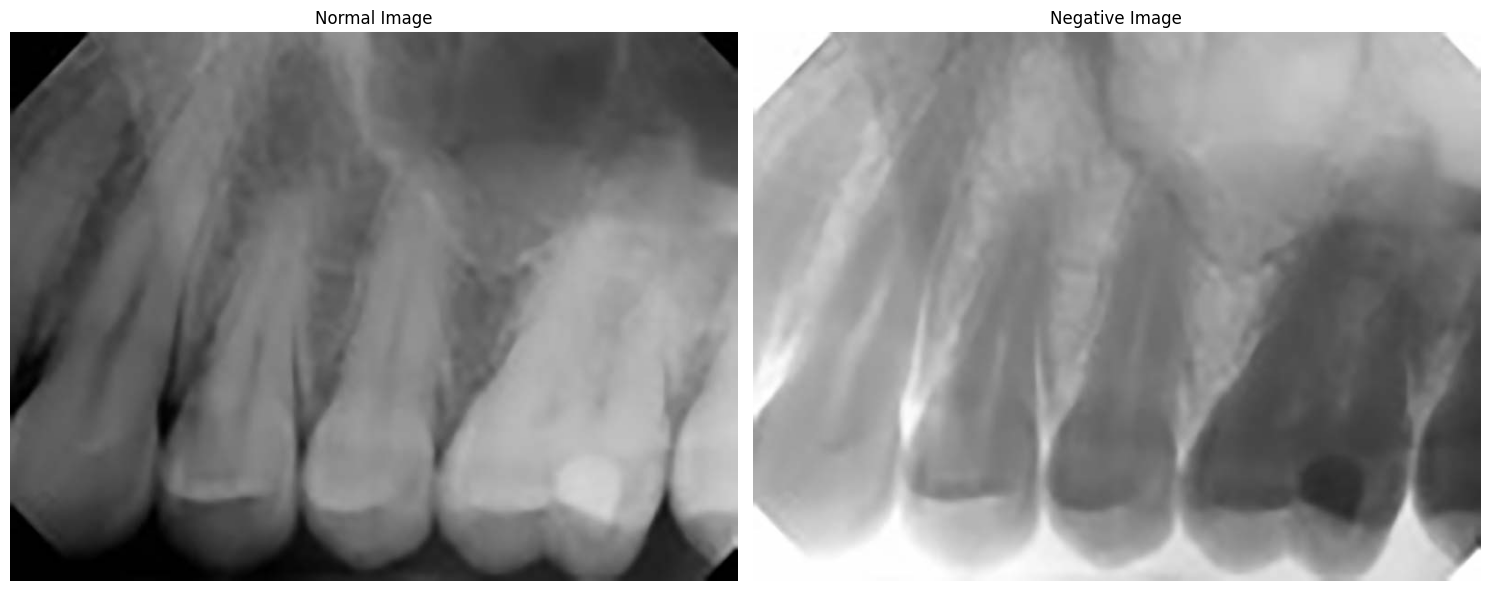

In [6]:
dental_array_img = np.array(dental_img)
negative = 255 - dental_array_img
dental_imgs = [ dental_array_img, negative]
labels = ["Normal Image", "Negative Image"]

fig, axs = plt.subplots(1, 2, figsize=(15,6))
for i, dental in enumerate(dental_imgs):
    axs[i].imshow(dental)
    axs[i].set_title(labels[i])
    axs[i].axis("off")

plt.tight_layout()
plt.show()

### 3. Gamma Correction and its Application: A Case Study in *specify case study*

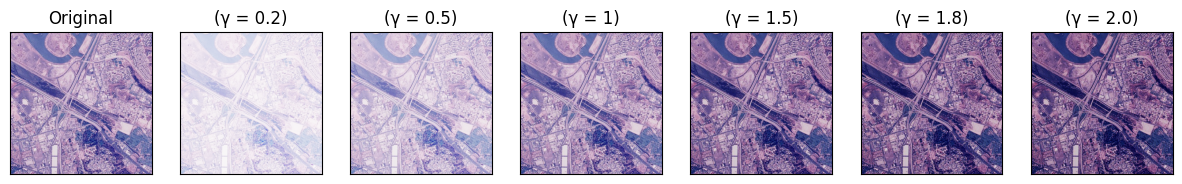

In [7]:
map_array_img = np.array(map_img)

gammaImages = [map_array_img]
gammaValues = [0.2, 0.5, 1, 1.5, 1.8, 2.0]

for i in range(len(gammaValues)):
  gammaImages.append(np.array(255 * (map_array_img / 255) ** gammaValues[i], dtype=np.uint8))

plt.figure(figsize=(15, 5))

for i in range(len(gammaImages)):
    plt.subplot(1, len(gammaImages), i + 1)
    plt.imshow(gammaImages[i])

    # Corregir los títulos
    plt.title("Original" if i == 0 else f"(γ = {gammaValues[i - 1]})")

    plt.xticks([])
    plt.yticks([])

plt.show()

Image:
https://www.kaggle.com/datasets/luffyluffyluffy/the-uscsipi-image-database

Code:
https://medium.com/@koushikc2000/basic-operations-on-images-using-opencv-python-cb0d60d11911

### 4. Image substraction and its Application: A Case Study in *specify case study*

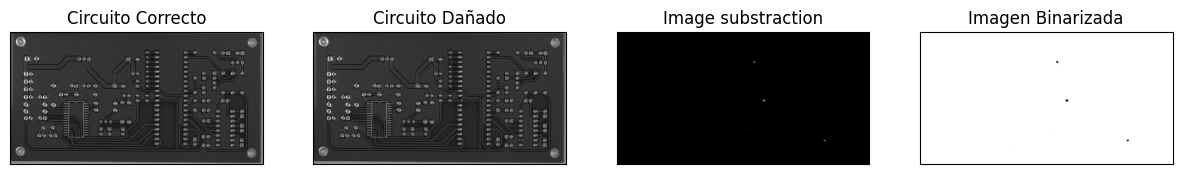

In [8]:
example_circuit_gray = cv2.cvtColor(np.array(example_circuit_img), cv2.COLOR_BGR2GRAY)
defected_circuit_gray = cv2.cvtColor(np.array(defected_circuit_img), cv2.COLOR_BGR2GRAY)

img2 = cv2.resize(defected_circuit_gray, (example_circuit_gray.shape[1], example_circuit_gray.shape[0]))

# Diferencia entre imágenes
diff = cv2.absdiff(example_circuit_gray, defected_circuit_gray)

# Binarizando
thresh = cv2.threshold(diff, 40, 255, cv2.THRESH_BINARY)[1]

inverted_diff = cv2.bitwise_not(thresh)

plt.figure(figsize=(15,5))
plt.subplot(1,4,1), plt.imshow(example_circuit_gray, cmap='gray'), plt.title("Circuito Correcto")
plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2), plt.imshow(defected_circuit_gray, cmap='gray'), plt.title("Circuito Dañado")
plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3), plt.imshow(diff, cmap='gray'), plt.title("Image substraction")
plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4), plt.imshow(inverted_diff, cmap='gray'), plt.title("Imagen Binarizada")
plt.xticks([]), plt.yticks([])
plt.show()

Dataset: https://www.kaggle.com/datasets/akhatova/pcb-defects

### References
[1] Smith, J., & Doe, A. (2020). *Title of the Paper*. Journal Name, Volume(Issue), pages. [DOI or URL](https://doi.org/example).

[2] Illustration of transforms — Torchvision main documentation. (2017). [https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html#:~:text=Photometric%20image%20transformation%20refers%20to,while%20preserving%20its%20geometric%20structure].
